### Stroke Prediction - Descriptive Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data set

strokedata = pd.read_csv('healthcare-dataset-stroke-data 2.csv')
strokedata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# evaluate datatypes in df 
strokedata.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
# see count of non-null entries 
strokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


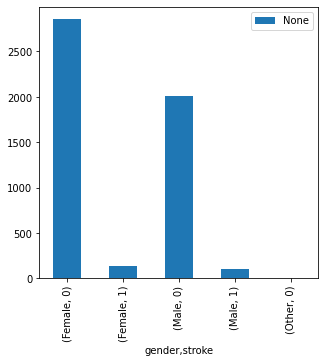

In [5]:
labels = ['Female', 'Male', 'Other' 'notsure', 'etc','k']
fig, ax = plt.subplots(figsize=(5,5))
genderoccurences = strokedata.groupby(['gender', 'stroke']).size().plot(kind='bar', ax=ax)
plt.legend()


In [6]:
genderoccurences = strokedata.groupby(['gender', 'stroke']).size()
genderoccurences

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
dtype: int64

In [7]:
from operator import index
genderodf = pd.DataFrame(genderoccurences).reset_index()
genderodf
#rename columns
genderodf.rename(columns={0:"totals"})

,gender,stroke,totals
0,Female,0,2853
1,Female,1,141
2,Male,0,2007
3,Male,1,108
4,Other,0,1


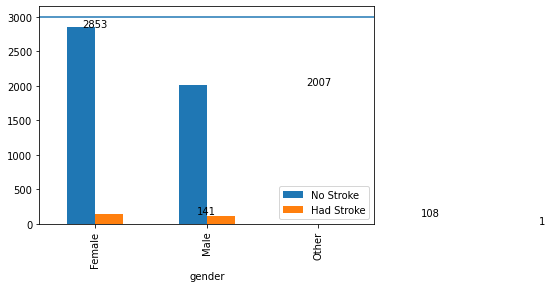

In [45]:
#create bar graph based on pivot table

from email import message
import enum
from webbrowser import get


genderodf.pivot_table(index='gender', columns='stroke').plot(kind='bar')
plt.legend(title='Legend')
plt.legend(['No Stroke', 'Had Stroke'])
plt.axhline(3000)

for indexv, genderv in enumerate(genderodf[0]):
    plt.text(indexv, genderv-1, f'{genderv}', ha='center')